<a href="https://colab.research.google.com/github/NeginS98/weight-dataset-processing/blob/main/Height_%26_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [79]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling
import warnings 
warnings.filterwarnings('ignore')

In [65]:
from google.colab import files
uploaded = files.upload()

Saving SOCR-HeightWeight.csv to SOCR-HeightWeight (4).csv


In [59]:
data = pd.read_csv('SOCR-HeightWeight.csv')
data.set_index('Index',inplace=True)
data

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


## **PreProcessing**

In [60]:
info = pd.DataFrame({'Missing data': data.isnull().sum(), 
                     'Type of data': data.dtypes, 
                     'Count of Data': len(data)})
info

,Missing data,Type of data,Count of Data
Height(Inches),0,float64,25000
Weight(Pounds),0,float64,25000


In [91]:
#  Pounds to Kilograms ==> 0.453592
df = pd.DataFrame({
    'weight': round(data['Weight(Pounds)'] * 0.453592, 2),
    'height': round(data['Height(Inches)'] * 0.0254, 3),
})
df['BMI'] = round(df.weight / (df.height) ** 2, 3)

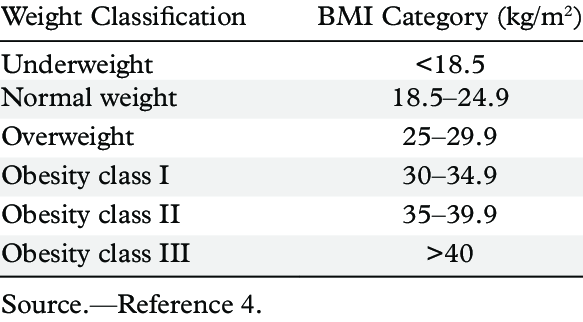

In [93]:
df.loc[df['BMI'] <= 18.5, 'weight_classification'] = 'Under weight' 
df.weight_classification[(df['BMI'] > 18.5) & (df['BMI'] <24.9)] = 'Normal weight'
df.weight_classification[(df['BMI'] >= 25) & (df['BMI'] <29.9)] = 'Overweight'
df.weight_classification[(df['BMI'] >= 30) & (df['BMI'] < 34.9)] = 'Obesity Class I'
df.weight_classification[(df['BMI'] >= 35) & (df['BMI'] < 39.9)] = 'Obesity Class II'
df.loc[df['BMI'] > 40, 'weight_classification'] = 'Obesity Class III' 
df

,weight,height,BMI,weight_classification
Index,,,,
1,51.25,1.671,18.354,Under weight
2,61.91,1.816,18.773,Normal weight
3,69.41,1.763,22.331,Normal weight
4,64.56,1.733,21.496,Normal weight
5,65.45,1.722,22.072,Normal weight
...,...,...,...,...
24996,53.54,1.765,17.187,Under weight
24997,54.52,1.640,20.271,Normal weight
24998,53.64,1.643,19.871,Normal weight


**weight classification Labels**

In [95]:
from sklearn.preprocessing import LabelEncoder
df_new = df.copy()

def Encoder_lbl(features_val, columns_name):
  lbl = LabelEncoder()
  labels = lbl.fit_transform(features_val)
  df_new[columns_name + '_label'] = labels

Encoder_lbl(df_new.weight_classification, 'weight')
df_new

,weight,height,BMI,weight_classification,weight_label
Index,,,,,
1,51.25,1.671,18.354,Under weight,2
2,61.91,1.816,18.773,Normal weight,0
3,69.41,1.763,22.331,Normal weight,0
4,64.56,1.733,21.496,Normal weight,0
5,65.45,1.722,22.072,Normal weight,0
...,...,...,...,...,...
24996,53.54,1.765,17.187,Under weight,2
24997,54.52,1.640,20.271,Normal weight,0
24998,53.64,1.643,19.871,Normal weight,0


## **Data Visuallization and Noise Detection**

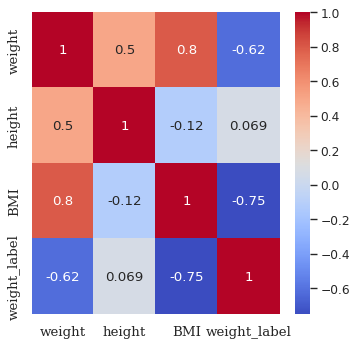

In [96]:
plt.figure(figsize=(5, 5), dpi=80)
sns.heatmap(data=df_new.corr(), annot=True, cmap='coolwarm')
plt.xticks(fontfamily='serif', fontsize=12)
plt.yticks(fontfamily='serif', fontsize=12)
plt.show()

In [97]:
df_new.weight_classification.unique()

array(['Under weight', 'Normal weight', 'Overweight'], dtype=object)

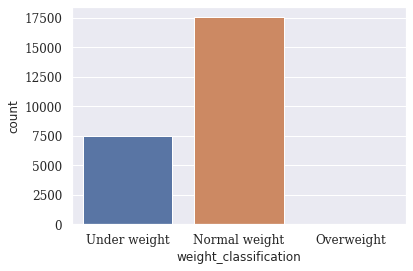

In [98]:
sns.set()
sns.countplot(data=df_new, x='weight_classification')
plt.xticks(fontfamily='serif', fontsize=12)
plt.yticks(fontfamily='serif', fontsize=12)
plt.show()

In [99]:
df_new.weight_classification[df_new['weight_classification'] == 'Under weight'].count()

7444

In [100]:
df_new.weight_classification[df_new['weight_classification'] == 'Normal weight'].count()

17550

Over weight category is not noise, but it will affect on our modeling process, so it's better to remove these data from our data frame

In [101]:
df_new[df_new['weight_classification'] == 'Overweight']

,weight,height,BMI,weight_classification,weight_label
Index,,,,,
3684,67.36,1.639,25.075,Overweight,1
8009,69.23,1.662,25.063,Overweight,1
10906,68.35,1.640,25.413,Overweight,1
16127,74.66,1.716,25.354,Overweight,1
21389,71.64,1.659,26.029,Overweight,1
23437,68.69,1.651,25.200,Overweight,1


In [102]:
df_new.drop(df_new[df_new['weight_classification'] == 'Overweight'].index, inplace=True)

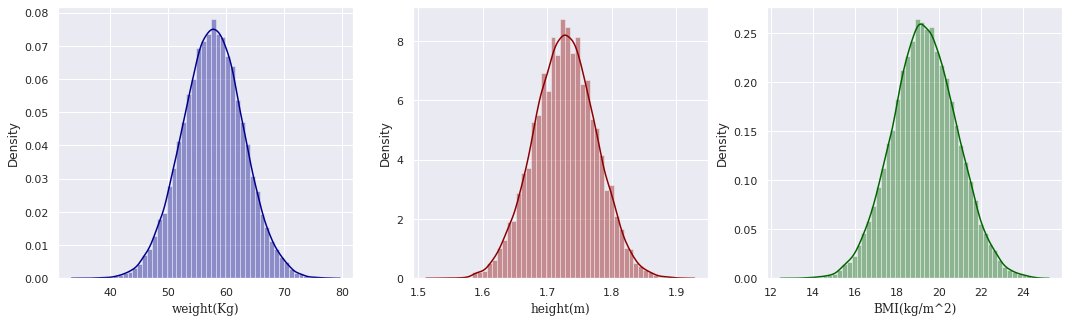

In [103]:
f, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.distplot(x=df_new.weight, color='darkblue', ax= axes[0])
sns.distplot(x=df_new.height, color='darkred',ax=axes[1])
sns.distplot(x=df_new.BMI, color='darkgreen',ax=axes[2])

axes[0].set_xlabel('weight(Kg)', fontfamily='serif')
axes[1].set_xlabel('height(m)', fontfamily='serif')
axes[2].set_xlabel('BMI(kg/m^2)', fontfamily='serif')

plt.show()

<Figure size 480x480 with 0 Axes>

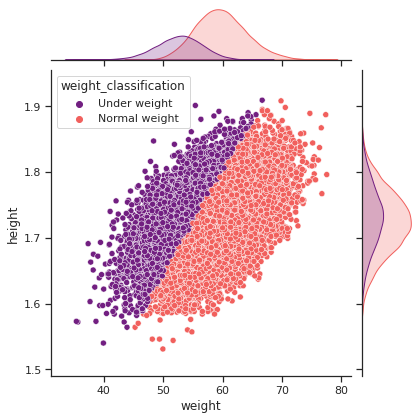

In [115]:
plt.figure(figsize=(6, 6), dpi=80)
sns.jointplot(data=df_new, x='weight', y='height', hue='weight_classification', palette='magma')
plt.xlabel('weight',fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('height',fontsize=12, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=10, fontfamily='serif')
plt.yticks(fontsize=10, fontfamily='serif')
plt.show()

In [106]:
BMI_sort = df_new.sort_values(by=['BMI'], ascending=True)
BMI_sort.reset_index(drop=True, inplace=True)

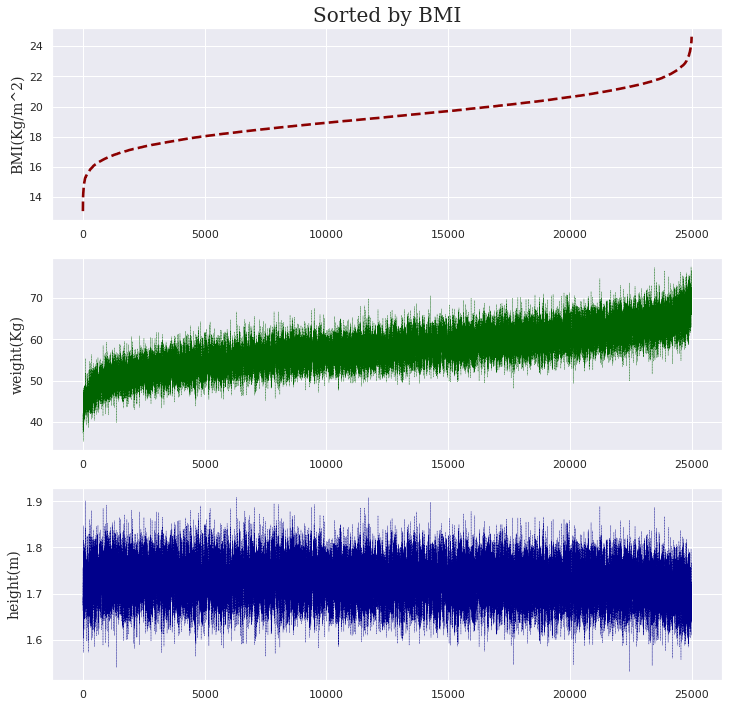

In [107]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].plot(BMI_sort.BMI, color='darkred',  linewidth='2.6', linestyle='dashed')
axs[1].plot(BMI_sort.weight, color='darkgreen',  linewidth='0.3', linestyle='dashed')
axs[2].plot(BMI_sort.height, color='darkblue',  linewidth='0.3', linestyle='dashed')
axs[0].set_title('Sorted by BMI',fontfamily='serif', fontsize=20)

axs[0].set_ylabel('BMI(Kg/m^2)', fontfamily='serif', fontsize=14)
axs[1].set_ylabel('weight(Kg)', fontfamily='serif', fontsize=14)
axs[2].set_ylabel('height(m)', fontfamily='serif', fontsize=14)
plt.show()

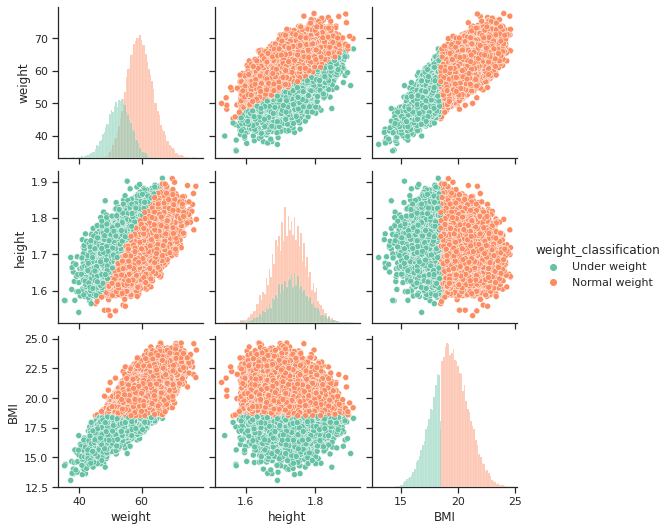

In [112]:
pair = df_new.drop('weight_label', axis=1)
sns.set_theme(style='ticks')
sns.pairplot(pair, hue='weight_classification', diag_kind='hist', palette='Set2')
plt.show()